In [14]:
import pandas as pd
import pandas as pd 
import seaborn as sns
import numpy as np  
import datetime
from scipy import stats as st
import matplotlib.pyplot as plt

In [15]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_af86b34e8e50450f835e7a79dc50ab8e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yn3nAgpqwdxQjGB9-qDv8TAaRe4O0MzIqxU3iPFvL2EN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_af86b34e8e50450f835e7a79dc50ab8e.get_object(Bucket='cs498-donotdelete-pr-8bi3hnl4d9fu5v',Key='mp1_av_disengagements.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

av_disengage_df = pd.read_csv(body)
av_disengage_df.head()


,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [16]:
body = client_af86b34e8e50450f835e7a79dc50ab8e.get_object(Bucket='cs498-donotdelete-pr-8bi3hnl4d9fu5v',Key='mp1_av_totalmiles.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

av_totalmiles_df = pd.read_csv(body)
av_totalmiles_df.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30


In [17]:
# (Task 0 Step 2 Part A) Summarize number of AV disengagements 
print("Total Number of AV disengagements: ", len(av_disengage_df))

# (Task 0 Step 2 Part B) Find number of unique months of AV disengagements 
print("Number unique months of Av disengagements: ", len(av_disengage_df.Month.unique()))

# (Task 0 Step 2 Part C) Find number of NaN for each column 
disengage_col = list(av_disengage_df.columns)
for col in disengage_col:
  print(f"Number of NaNs in {col}: ", av_disengage_df[col].isna().sum())


Total Number of AV disengagements:  1024
Number unique months of Av disengagements:  15
Number of NaNs in Month:  0
Number of NaNs in Car:  0
Number of NaNs in Location:  0
Number of NaNs in Weather:  0
Number of NaNs in TypeOfTrigger:  0
Number of NaNs in ReactionTime:  532
Number of NaNs in Cause:  0


Text(0.5, 1.0, 'Causes of AV disengagement')

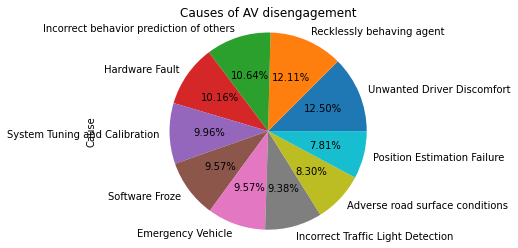

In [18]:
# (Task 0 Step 3) Make Pie-Chart of leading causes of AV disengagement 
av_disengage_df.Cause.value_counts().plot(kind = 'pie', autopct='%1.2f%%')
plt.axis('equal')
plt.title("Causes of AV disengagement")


Task 0 Step 3 Question - Based on the pie chart, the top 3 leading causes of AV disengagement appear to be Unwanted Driver Discomfort, Recklessly behaving agent, and incorrect behavior prediction of others

In [19]:
av_totalmiles_df['Month'] = pd.to_datetime(av_totalmiles_df['Month'],format='%y-%b')
totalmiles = av_totalmiles_df.groupby('Month').sum().reset_index()
totalmiles['disengagement per mile'] = totalmiles['total number of disengagements']/totalmiles['miles driven in autonomous mode']
totalmiles

,Month,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements,disengagement per mile
0,2014-09-01,4207,44,24,20,0.010459
1,2014-10-01,61881,244,111,133,0.003943
2,2014-11-01,58824,189,85,104,0.003213
3,2014-12-01,9413,36,15,21,0.003824
4,2015-01-01,18192,48,18,30,0.002639
5,2015-02-01,18745,16,8,8,0.000854
6,2015-03-01,22204,39,31,8,0.001756
7,2015-04-01,31927,72,51,21,0.002255
8,2015-05-01,38017,34,11,23,0.000894
9,2015-06-01,42047,127,58,69,0.003020


Text(0, 0.5, 'Disengagements per Mile')

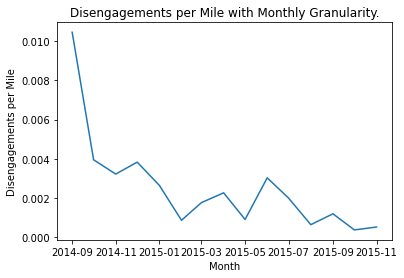

In [20]:
plt.plot(totalmiles['Month'], totalmiles['disengagement per mile'])
plt.title('Disengagements per Mile with Monthly Granularity.')
plt.xlabel('Month')
plt.ylabel('Disengagements per Mile')

Task 0 Step 4 Question - Based on this plot, the trend seems to be that the the number of disengagement per mile has decreased with each consecutive month. It would indicate that the AVs are improving over time

Text(0.5, 0, 'Reaction Time')

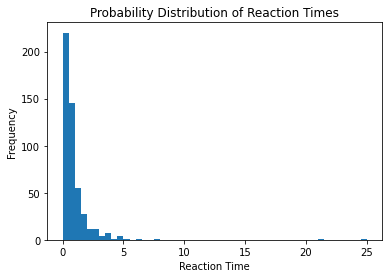

In [21]:
# (Task 1 Step 1) Plot the probability distribution of reaction times.
av_disengage_df['ReactionTime'].dropna().plot(kind = 'hist', bins = 50)
plt.title('Probability Distribution of Reaction Times')
plt.xlabel('Reaction Time')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


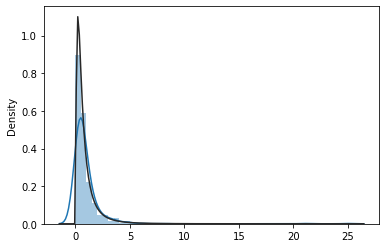

In [22]:
sns.distplot(av_disengage_df['ReactionTime'].dropna().values, fit = st.exponweib)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


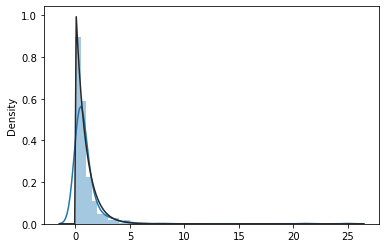

In [23]:
sns.distplot(av_disengage_df['ReactionTime'].dropna().values, fit = st.expon)

Task 1 Step 1 Question - It would seem that the distribution most accurately fits a Weibull distribution. This signifies that a high reaction time for human beings is very rare.

In [24]:
# (Task 1 Step 2 Part A) Compute the average reaction time for the entire duration of the dataset
average_reaction_time = av_disengage_df['ReactionTime'].mean()
print(f'Average reaction time for the entire duration of the dataset: ' + str(average_reaction_time))

Average reaction time for the entire duration of the dataset: 0.9297703252032521


In [25]:
# (Task 1 Step 2 Part B) Compute the average reaction time for the entire duration of the dataset
#                               differentiated by the location of disengagement
average_reaction_time = av_disengage_df.groupby(av_disengage_df['Location']).mean()
print(average_reaction_time)

              ReactionTime
Location                  
highway            1.48000
urban-street       0.92865


In [26]:
# (Task 1 Step 3 Part A) Perform a hypothesis testing at 0.03 significance level. 
test = st.ttest_1samp(list(av_disengage_df[av_disengage_df['ReactionTime'].notnull()]['ReactionTime']), 1.09)
print(test[0], test[1])

-2.0986037086235854 0.03636206696694606


Text(0.5, 0, 'Disengagements per Mile')

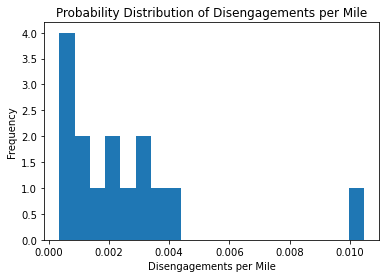

In [27]:
# (Task 1 Step 4)
totalmiles['disengagement per mile'].plot(kind = 'hist', bins = 20)
plt.title('Probability Distribution of Disengagements per Mile')
plt.xlabel('Disengagements per Mile')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


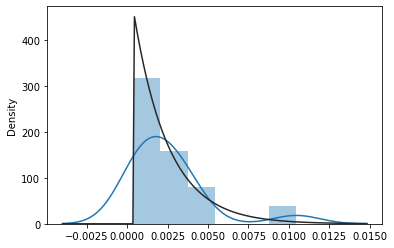

In [28]:
sns.distplot(totalmiles['disengagement per mile'].values, fit = st.expon)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1678: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


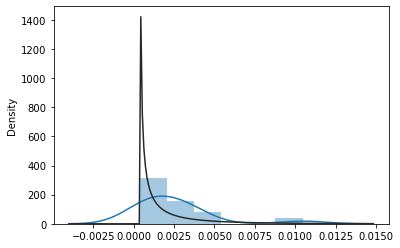

In [29]:
sns.distplot(totalmiles['disengagement per mile'].values, fit = st.exponweib)

Task 1 Step 4 Question - It would seem that the distribution most accurately fits an exponential distribution.

Task 2 Step 1 Part A - The assumption of at most one disengagement per mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a Bernouli distribution.

In [30]:
# (Task 2 Step 1 Part B) Find the probability of disengagement per mile given that the weather is cloudy.
prob_dpm = totalmiles['total number of disengagements'].sum()/totalmiles['miles driven in autonomous mode'].sum()
prob_cld = 0.28
prob_cld_dpm = (sum(av_disengage_df['Weather'] == 'cloudy') / len(av_disengage_df))  #The probability of weather being cloudy given disengagement per mile

prob_dpm_cld = prob_cld_dpm * prob_dpm / prob_cld

prob_dpm_cld


0.00590255677552725

Task 2 Step 1 Part B - P(Disengagement per mile | cloudy) = P(cloudy | Disengagement per mile) * P(Disengagement per mile) / P(cloudy) = 0.00590255677552725

In [31]:
# (Task 2 Step 1 Part C) Find the probability of disengagement per mile given that the weather is clear.
prob_clr = 0.72
prob_clr_dpm = (sum(av_disengage_df['Weather'] == 'clear') / len(av_disengage_df)) #The probability of weather being clear given disengagement per mile

prob_dpm_clr = prob_clr_dpm * prob_dpm / prob_clr

prob_dpm_clr

0.0005195663748517999

Task 2 Step 1 Part C - P(Disengagement per mile | clear) = P(clear | Disengagement per mile) * P(Disengagement per mile) / P(clear) = 0.0005195663748517999

In [32]:
# (Task 2 Step 1 Part D) Find the probability of automatic disengagement per mile given that the weather is cloudy. Find the probability of automatic disengagement per mile given that the weather is clear.

prob_auto_dpm_cld = (sum((av_disengage_df['Weather'] == 'cloudy') & (av_disengage_df['TypeOfTrigger'] == 'automatic')) / len(av_disengage_df)) * prob_dpm / prob_cld 

prob_auto_dpm_clr = (sum((av_disengage_df['Weather'] == 'clear') & (av_disengage_df['TypeOfTrigger'] == 'automatic')) / len(av_disengage_df)) * prob_dpm / prob_clr

print(prob_auto_dpm_cld, prob_auto_dpm_clr)

0.0028063653172267287 0.00026390673008345393


Task 2 Step 1 Part D - P(Automatic & Disengagement per mile | cloudy) = P(cloudy, automatic | Disengagement per mile) * P(Disengagement per mile) / P(cloudy) = 0.0028063653172267287
P(Automatic & Disengagement per mile | clear) = P(clear, automatic | Disengagement per mile) * P(Disengagement per mile) / P(clear) = 0.00026390673008345393

In [33]:
# (Task 2 Step 1 Part E) Find how likely it is that in 10000 miles, there are 100 or more disengagements under cloudy conditions.
mean = 10000 * prob_dpm_cld
std = np.sqrt(10000 * prob_dpm_cld * (1 - prob_dpm_cld)) # 10000 * P(DPM | Cloudy) * (1 - P(DPM | Cloudy))
#print(mean, std)
prob_hundredplus_cld = 1 - st.norm(mean, std).cdf(99.9) #Approximating using Normal Distribution
prob_hundredplus_cld

4.7505365530220445e-08

Task 2 Step 1 Part E - The probability of there 100 or more disengagements under cloudy conitions is 4.7505365530220445e-08.

In [34]:
# (Task 2 Step 2) At a 0.05 significance level, test the following hypothesis: The AV has more disengagements (automatic and manual) on cloudy days than clear days.

# use two-proportion z-test where two samples are cloudy days and clear days 

# formula used : ((p1 - p2) - 0) / (sqrt(p * (1-p) * ((1/n1) + (1/n2))))

# Based on the assumptions given for the problem (A day can be cloudy or clear, but not both), days are split into cloudy and clear based on what was most common for that day in the data
# 14 Sep - cloudy, 14 Oct - cloudy, 14 Nov - cloudy, 14 Dec - clear, 15 Jan - clear, 15 Feb - clear, 15 March - clear, 15 Apr - cloudy, 15 May - cloudy
# 15 June - cloudy, 15 July - cloudy , 15 Aug - cloudy, 15 Sept - cloudy, 15 Oct - cloudy, 15 Nov - Cloudy 

# Figure out the total number of miles driven in cloudy and clear conditions respectively and disengagments 
# Using assumption that there can only be one disengagement in a mile 

miles_list = list(av_totalmiles_df['miles driven in autonomous mode'])
diseng_list = list(av_totalmiles_df['total number of disengagements'])

#clear conditions:
miles_clear = sum(miles_list[3:7])
#print(miles_clear)
diseng_clear = sum(diseng_list[3:7])
#print(diseng_clear)

#cloudy conditions
miles_cloudy = sum(miles_list[0:3]) + sum(miles_list[7: len(miles_list)])
#print(miles_cloudy)
diseng_cloudy = sum(diseng_list[0:3]) + sum(diseng_list[7:len(diseng_list)])
#print(diseng_cloudy)

#calculating p1 and p2 
p1 =  diseng_clear / miles_clear
p2 = diseng_cloudy / miles_cloudy 
#print(p1, p2)
#calculating p 
p = (diseng_clear + diseng_cloudy) / (miles_clear + miles_cloudy)
#print(p) 

#numerator and denominator of formula
num = p1 - p2 
den = np.sqrt(p * (1 - p) * ((1/miles_cloudy) + (1/miles_clear)))

print("z-score: " , num/den)

z-score:  0.004978288939337362


H_0: # of disengagements on a cloudy day <= # of disengagments on a clear day

H_1: # of disengagements on a cloudy day > # of disengagements on a clear day

In [35]:
# (Task 2 Step 3 Part A) The conditional probability that the reaction time is greater than 0.4s given that the weather was cloudy.
prob_rt_cld = sum((av_disengage_df['Weather'] == 'cloudy') & (av_disengage_df['TypeOfTrigger'] == 'automatic') & (av_disengage_df['ReactionTime'] > 0.4)) / sum((av_disengage_df['Weather'] == 'cloudy') & (av_disengage_df['TypeOfTrigger'] == 'automatic')) 
prob_rt_cld

0.6120906801007556

Task 2 Step 3 Part A - The probability of the reaction time being greater than 0.4s given that the weather was cloudy: 0.6120906801007556.
    
P(RT > 0.7 | automatic, clear) = conditional observations of RT > 0.7 & Automatic & Cloudy

In [36]:
# (Task 2 Step 3 Part B) The conditional probability that the reaction time is greater than 0.4s given that the weather was cloudy.
prob_rt_clr = sum((av_disengage_df['Weather'] == 'clear') & (av_disengage_df['TypeOfTrigger'] == 'automatic') & (av_disengage_df['ReactionTime'] > 0.7)) / sum((av_disengage_df['Weather'] == 'clear') & (av_disengage_df['TypeOfTrigger'] == 'automatic')) 
prob_rt_clr

0.3854166666666667

Task 2 Step 3 Part B - The probability of the reaction time being greater than 0.4s given that the weather was cloudy: 0.3854166666666667.
    
P(RT > 0.7 | automatic, clear) = conditional observations of RT > 0.7 & Automatic & Clear

In [37]:
# (Task 2 Step 4) Find the probability of an accident per mile due to automatic AV disengagement and slow reaction.
prob_accident = (prob_rt_cld * prob_dpm_cld * prob_cld) + (prob_rt_clr * prob_dpm_clr * prob_clr)

prob_accident

0.0011557916665197979

Task 2 Step 4 - The probabilty of an accident per mile due to automatic AV disengagement and slow reaction is 0.0011557916665197979.

P(accident per mile) = (P(RT > 0.4 | automatic, cloudy) * P(DPM | cloudy) * P(cloudy)) + (P(RT > 0.7 | automatic, clear) * P(DPM | clear) * P(clear))

In [38]:
# (Task 2 Step 5) Find how the accident rates of AV obtained from the previous question compare to that of human drivers. 
prob_accident_human = 2e-6

print(prob_accident, prob_accident_human)
print(prob_accident/prob_accident_human)

0.0011557916665197979 2e-06
577.895833259899


Task 2 Step 5 - The accident rates of an AV is a lot higher compared to accident rates that of human drivers. This indicates that we should be cautious when trusting AVs.

In [39]:
# (Task 2 Step 6) Perform a two-sample Kolmogorov-Smirnov test  to compare the following two distributions: (1) distribution of disengagement reaction time when the weather is cloudy and (2) distribution of disengagement reaction time when the weather is clear.
react_cld = av_disengage_df[(av_disengage_df['Weather'] == 'cloudy')]['ReactionTime']#.dropna()
react_clr = av_disengage_df[(av_disengage_df['Weather'] == 'clear')]['ReactionTime']#.dropna()
stat, pval = st.ks_2samp(react_cld, react_clr)
print(stat, pval)

0.05633178088267909 0.6872561980283933


Task 2 Step 6 -
H_0: The distribution of disengagement reaction time when the weather is cloudy is equal to the distribution of disengagement reaction time when the weather is clear

H_1: The distribution of disengagement reaction time when the weather is cloudy is not equal to the distribution of disengagement reaction time when the weather is clear

By looking at our p-value of 0.6872561980283936, we are able to decide that at a significance level of 0.1, the distribution of disengagement reaction reaction time when the weather is cloudy is equal to the distribution of disengagement reaction time when the weather is clear.

In [40]:
body = client_af86b34e8e50450f835e7a79dc50ab8e.get_object(Bucket='cs498-donotdelete-pr-8bi3hnl4d9fu5v',Key='mp1_uav_accidents.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

accidents = pd.read_csv(body)
accidents.head()


,Year,Month,Altitude,Phase_of_Flight,Precipitation,WindSpeed,Mission,RootCause,TimeBeforeAccident
0,2016,3,15,TakeOff,Rainy,6,Training,Power System,8
1,2016,5,300,TakeOff,Rainy,10,Photography,Human Factor,3
2,2016,3,15,Cruise,Rainy,2,Training,Computational Software & Hardware,5
3,2016,4,300,Cruise,Rainy,3,Photography,Communication Link,250
4,2016,7,45,TakeOff,Dry,8,Photography,Environmental Disruption,8


In [41]:
body = client_af86b34e8e50450f835e7a79dc50ab8e.get_object(Bucket='cs498-donotdelete-pr-8bi3hnl4d9fu5v',Key='mp1_uav_totalhours.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

hours = pd.read_csv(body)
hours.head()


,Year,Month,Accumulated_hours
0,2016,1,2600
1,2016,2,4000
2,2016,3,4600
3,2016,4,1900
4,2016,5,7600


In [42]:
df1 = pd.DataFrame(columns = ['Year', 'Month', 'Num_accidents'])

for year in range(2016, 2021):
    for month in range(1,13):
        num_accidents = len(accidents[(accidents['Year'] == year) & (accidents['Month'] == month)])
        df1 = df1.append({'Year': year, 'Month': month, 'Num_accidents' : float(num_accidents)}, ignore_index = True)

df1.drop([56,57,58,59], inplace=True)


df1['FlightHours'] = hours['Accumulated_hours']

accident_hrs = []
for x in range(len(df1)):
    num_accidents = df1.at[x,'Num_accidents']
    flighthours = df1.at[x, 'FlightHours']
    accident_hrs.append(num_accidents/flighthours)
    
df1['Accident Per Flight Hour'] = accident_hrs

Text(0.5, 1.0, 'Accidents Per Flight Hour Per Month')

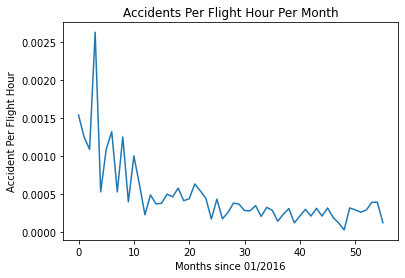

In [43]:
sns.lineplot(data=df1['Accident Per Flight Hour'])
plt.xlabel("Months since 01/2016")
plt.title("Accidents Per Flight Hour Per Month")
#1: The accident per flight hour has been decreasing with an exponential decay.
#   This indicates that UAV technology is still progressing, but the impact of 
#   each innovation on lowering accident rates is decreasing.

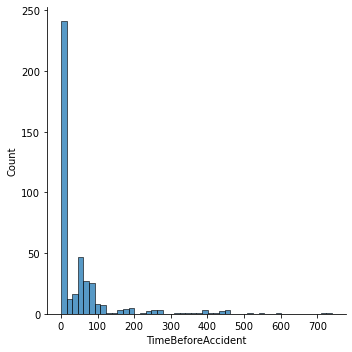

In [44]:
#2a: A longer time before accident indicates that the UAV is less prone to failure.
#2b: The TimeBeforeAccident Data follows an expontial distribution.  
sns.displot(data=accidents['TimeBeforeAccident'])

Text(0.5, 1.0, 'Time Before Accident vs Wind Speed')

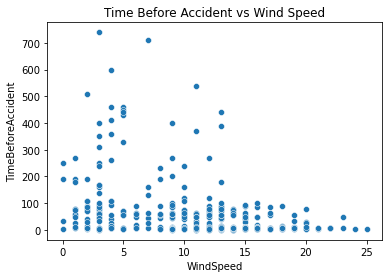

In [45]:
sns.scatterplot(x=accidents['WindSpeed'], y=accidents['TimeBeforeAccident'], data=accidents)
plt.title("Time Before Accident vs Wind Speed")
# There appears to be a strong correlation between flight time and wind speeds
# greater than ~14mph, but from 0~14mph there seems to be less correlation.

In [46]:
accidents.corr(method='pearson')

,Year,Month,Altitude,WindSpeed,TimeBeforeAccident
Year,1.000000,-0.150829,-0.065389,0.034950,0.013348
Month,-0.150829,1.000000,0.046849,0.030255,0.019269
Altitude,-0.065389,0.046849,1.000000,-0.002257,-0.079376
WindSpeed,0.034950,0.030255,-0.002257,1.000000,-0.347758
TimeBeforeAccident,0.013348,0.019269,-0.079376,-0.347758,1.000000


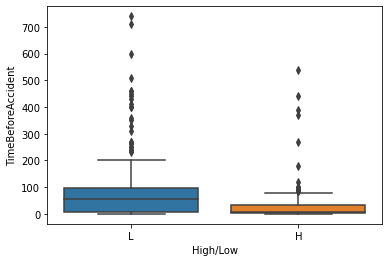

In [47]:
high_low = []
for speed in accidents['WindSpeed']:
    if speed > 10:
        high_low.append('H')
    else:
        high_low.append('L')

accidents['High/Low'] = high_low
sns.boxplot(x="High/Low", y="TimeBeforeAccident", data=accidents)

In [48]:
low_ = accidents[(accidents['High/Low']=='L')]
total_time_L = sum(low_['TimeBeforeAccident'])
avg_time_L = total_time_L/len(low_)

high_ = accidents[(accidents['High/Low']=='H')]
total_time_H = sum(high_['TimeBeforeAccident'])
avg_time_H = total_time_H/len(high_)

print("High:", avg_time_H, "Low:", avg_time_L)

High: 29.341463414634145 Low: 95.77222222222223


In [49]:
#Followed Z-Stat example from lecture 2 slides 42-43

n_h = len(high_) # Num high windspeeds
n_l = len(low_)  #Num low windspeeds

T = n_h+n_l #Total num samples

pL = n_l/T
pH = n_h/T
p = (pL+pH)/(2*T)
q = 1-p

num = pL - pH
den = np.sqrt(p*q*2*T)
z = num/den

print("z:", z)

z: -0.15502057869287905


In [56]:
#Task 3.5.a


# P(sens/mech | takeoff) = (P(takeoff | sens/mech) * P(sens/mech)) / P(takeoff)
# P(takeoff | sens/mech) = P(takeoff & sens/mech) / P(sens/mech)


takeoff = low_[(low_['Phase_of_Flight'])=='TakeOff']
sensor_mech = takeoff[(takeoff['RootCause'])=='Sensors & Mechanical Components']

prior_sensor_mech = len(sensor_mech)/len(low_) # P(sens/mech)
prior_takeoff = len(takeoff)/len(low_) # P(takeoff)

sens_mech_takeoff = sensor_mech
p_sens_mech_takeoff = len(sens_mech_takeoff)/len(low_) # P(takeoff & sens/mech)
likelihood = p_sens_mech_takeoff / prior_sensor_mech # P(takeoff | sens/mech)

posterior = likelihood * prior_sensor_mech / prior_takeoff #P(sens/mech | takeoff)


print("Assuming Low wind speeds: P(sens/mech | takeoff) = ",posterior)

Assuming Low wind speeds: P(sens/mech | takeoff) =  0.16666666666666669


In [57]:
#Assume that accident during first flight becomes a data point in the accident data and alters our likelihood and evidence.

prior_sensor_mech = len(sensor_mech)/(1+len(low_)) # P(sens/mech)
prior_takeoff = (len(takeoff)+1)/(1+len(low_)) # P(takeoff)

sens_mech_takeoff = sensor_mech
p_sens_mech_takeoff = len(sens_mech_takeoff)/(1+len(low_)) # P(takeoff & sens/mech)
likelihood = p_sens_mech_takeoff / prior_sensor_mech # P(takeoff | sens/mech)

posterior = likelihood * prior_sensor_mech / prior_takeoff #P(sens/mech | takeoff)


print("Assuming Low wind speeds: P(sens/mech | takeoff) = ",posterior)

Assuming Low wind speeds: P(sens/mech | takeoff) =  0.15999999999999998


In [60]:
# 3.5.d

# P(sens/mech | takeoff) = (P(takeoff | sens/mech) * P(sens/mech)) / P(takeoff)
# P(takeoff | sens/mech) = P(takeoff & sens/mech) / P(sens/mech)


takeoff = high_[(high_['Phase_of_Flight'])=='TakeOff']
sensor_mech = takeoff[(takeoff['RootCause'])=='Sensors & Mechanical Components']

prior_sensor_mech = len(sensor_mech)/len(high_) # P(sens/mech)
prior_takeoff = len(takeoff)/len(high_) # P(takeoff)

sens_mech_takeoff = sensor_mech
p_sens_mech_takeoff = len(sens_mech_takeoff)/len(high_) # P(takeoff & sens/mech)
likelihood = p_sens_mech_takeoff / prior_sensor_mech # P(takeoff | sens/mech)

posterior = likelihood * prior_sensor_mech / prior_takeoff #P(sens/mech | takeoff)


print("Assuming High wind speeds: P(sens/mech | takeoff) = ",posterior)

Assuming High wind speeds: P(sens/mech | takeoff) =  0.18518518518518517


In [61]:
#Assume that accident during first flight becomes a data point in the accident data and alters our likelihood and evidence.

prior_sensor_mech = len(sensor_mech)/(1+len(high_)) # P(sens/mech)
prior_takeoff = (len(takeoff)+1)/(1+len(high_)) # P(takeoff)

sens_mech_takeoff = sensor_mech
p_sens_mech_takeoff = len(sens_mech_takeoff)/(1+len(high_)) # P(takeoff & sens/mech)
likelihood = p_sens_mech_takeoff / prior_sensor_mech # P(takeoff | sens/mech)

posterior = likelihood * prior_sensor_mech / prior_takeoff #P(sens/mech | takeoff)


print("Assuming High wind speeds: P(sens/mech | takeoff) = ",posterior)

Assuming High wind speeds: P(sens/mech | takeoff) =  0.17857142857142858


In [62]:
#Calculating Conditional Probabilites for 3.6.c:

P_Rainy = accidents[(accidents['Precipitation']) == 'Rainy']
P_Dry = accidents[(accidents['Precipitation']) == 'Dry']
print('P_Rainy =', (len(P_Rainy)/len(accidents)), 'P_Dry =', len(P_Dry)/len(accidents))

W_Low = accidents[(accidents['High/Low']) == 'L']
W_High = accidents[(accidents['High/Low']) == 'H']
print('W_Low =', (len(W_Low)/len(accidents)), 'W_High =', len(W_High)/len(accidents))

P_Rainy = 0.6995305164319249 P_Dry = 0.3004694835680751
W_Low = 0.4225352112676056 W_High = 0.5774647887323944


In [63]:
# Variable Naming:
# N_SMF... = Not Sensor/Mech Failure
# R_L = Rainy & Low Wind Speeds
# PD = Precipitation Dry
# WH = High Wind Speeds
# TOF, C, L = TakeOff, Cruise, Landing


#P(Sensor & Mechanical Component Failure | Precipitation, Wind Speed)

R_L = accidents[(accidents['High/Low'] == 'L') & (accidents['Precipitation'] == 'Rainy')]
R_H = accidents[(accidents['High/Low'] == 'H') & (accidents['Precipitation'] == 'Rainy')]

D_L = accidents[(accidents['High/Low'] == 'L') & (accidents['Precipitation'] == 'Dry')]
D_H = accidents[(accidents['High/Low'] == 'H') & (accidents['Precipitation'] == 'Dry')]

SMF_PR_WH = accidents[(accidents['High/Low'] == 'H') & (accidents['Precipitation'] == 'Rainy') & (accidents['RootCause'] == 'Sensors & Mechanical Components')]
N_SMF_PR_WH = accidents[(accidents['High/Low'] == 'H') & (accidents['Precipitation'] == 'Rainy') & (accidents['RootCause'] != 'Sensors & Mechanical Components')]
print('SMF_PR_WH =', len(SMF_PR_WH)/len(R_H), 'N_SMF_PR_WH =', len(N_SMF_PR_WH)/len(R_H))

SMF_PR_WL = accidents[(accidents['High/Low'] == 'L') & (accidents['Precipitation'] == 'Rainy') & (accidents['RootCause'] == 'Sensors & Mechanical Components')]
N_SMF_PR_WL = accidents[(accidents['High/Low'] == 'L') & (accidents['Precipitation'] == 'Rainy') & (accidents['RootCause'] != 'Sensors & Mechanical Components')]
print('SMF_PR_WL =', len(SMF_PR_WL)/len(R_L), 'N_SMF_PR_WL =', len(N_SMF_PR_WL)/len(R_L))

SMF_PD_WL = accidents[(accidents['High/Low'] == 'L') & (accidents['Precipitation'] == 'Dry') & (accidents['RootCause'] == 'Sensors & Mechanical Components')]
N_SMF_PD_WL = accidents[(accidents['High/Low'] == 'L') & (accidents['Precipitation'] == 'Dry') & (accidents['RootCause'] != 'Sensors & Mechanical Components')]
print('SMF_PD_WL =', len(SMF_PD_WL)/len(D_L), 'N_SMF_PD_WL =', len(N_SMF_PD_WL)/len(D_L))

SMF_PD_WH = accidents[(accidents['High/Low'] == 'H') & (accidents['Precipitation'] == 'Dry') & (accidents['RootCause'] == 'Sensors & Mechanical Components')]
N_SMF_PD_WH = accidents[(accidents['High/Low'] == 'H') & (accidents['Precipitation'] == 'Dry') & (accidents['RootCause'] != 'Sensors & Mechanical Components')]
print('SMF_PD_WH =', len(SMF_PD_WH)/len(D_H), 'N_SMF_PD_WH =', len(N_SMF_PD_WH)/len(D_H))

SMF_PR_WH = 0.21637426900584794 N_SMF_PR_WH = 0.783625730994152
SMF_PR_WL = 0.23622047244094488 N_SMF_PR_WL = 0.7637795275590551
SMF_PD_WL = 0.18867924528301888 N_SMF_PD_WL = 0.8113207547169812
SMF_PD_WH = 0.22666666666666666 N_SMF_PD_WH = 0.7733333333333333


In [64]:
#P(Phase of Flight | Sensor & Mechanical Components Failure)
SMF = accidents[(accidents['RootCause'] == 'Sensors & Mechanical Components')]
N_SMF = accidents[(accidents['RootCause'] != 'Sensors & Mechanical Components')]

SMF_TOF = accidents[(accidents['Phase_of_Flight'] == 'TakeOff') & (accidents['RootCause'] == 'Sensors & Mechanical Components')]
N_SMF_TOF = accidents[(accidents['Phase_of_Flight'] == 'TakeOff') & (accidents['RootCause'] != 'Sensors & Mechanical Components')]
print("SMF_TOF = ", len(SMF_TOF)/len(SMF), "N_SMF_TOF = ", len(N_SMF_TOF)/len(N_SMF))

SMF_C = accidents[(accidents['Phase_of_Flight'] == 'Cruise') & (accidents['RootCause'] == 'Sensors & Mechanical Components')]
N_SMF_C = accidents[(accidents['Phase_of_Flight'] == 'Cruise') & (accidents['RootCause'] != 'Sensors & Mechanical Components')]
print("SMF_C = ", len(SMF_C)/len(SMF), "N_SMF_C = ", len(N_SMF_C)/len(N_SMF))

SMF_L = accidents[(accidents['Phase_of_Flight'] == 'Landing') & (accidents['RootCause'] == 'Sensors & Mechanical Components')]
N_SMF_L = accidents[(accidents['Phase_of_Flight'] == 'Landing') & (accidents['RootCause'] != 'Sensors & Mechanical Components')]
print("SMF_L = ", len(SMF_L)/len(SMF), "N_SMF_L = ", len(N_SMF_L)/len(N_SMF))

SMF_TOF =  0.09574468085106383 N_SMF_TOF =  0.12650602409638553
SMF_C =  0.6914893617021277 N_SMF_C =  0.6536144578313253
SMF_L =  0.2127659574468085 N_SMF_L =  0.21987951807228914


In [65]:
# P(Cruise)

cruise = accidents[(accidents['Phase_of_Flight']) == 'Cruise']
print("P(F=Cruise) =", len(cruise)/len(accidents))

P(F=Cruise) = 0.6619718309859155
